#**Pakistan Suicide Bombing Attacks**

#**Data Loading**

In [ ]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('suicide.csv')

#**Basic Statistic**

In [ ]:
data.head()

,Date,Islamic Date,Blast Day Type,Holiday Type,City,Latitude,Longitude,Province,Location,Location Category,Location Sensitivity,Open and Closed Space,Target Type,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Temperature(C),Temperature(F)
0,1995-11-19,25 Jumaada al-THaany 1416 A.H,Non-Working Day,Weekend,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,Foreign,High,Closed Space,Foreigner,14,15.0,30.0,60,2,15.835,60.503
1,2000-11-06,10 SHa`baan 1421 A.H,Working Day,Weekend,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,Office Building,Low,Closed Space,Media,8,3.0,1.5,3,1,23.770,74.786
2,2002-05-08,25 safar 1423 A.H,Working Day,Weekend,Karachi,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star She...,Hotel,Medium,Closed Space,Foreigner,13,15.0,20.0,40,1,31.460,88.628
3,2002-06-14,3 Raby` al-THaany 1423 A.H,Working Day,Weekend,Karachi,24.9918,66.9911,Sindh,US Consulate Civil Lines Area,Foreign,High,Closed Space,Foreigner,8,12.0,25.5,51,1,31.430,88.574
4,2003-07-04,4 Jumaada al-awal 1424 A.H,Working Day,Weekend,Quetta,30.2095,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,Religious,Medium,Closed Space,Religious,44,47.0,32.5,65,1,33.120,91.616


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   462 non-null    object 
 1   Islamic Date           519 non-null    object 
 2   Blast Day Type         519 non-null    object 
 3   Holiday Type           519 non-null    object 
 4   City                   519 non-null    object 
 5   Latitude               519 non-null    float64
 6   Longitude              519 non-null    float64
 7   Province               519 non-null    object 
 8   Location               519 non-null    object 
 9   Location Category      519 non-null    object 
 10  Location Sensitivity   519 non-null    object 
 11  Open and Closed Space  519 non-null    object 
 12  Target Type            519 non-null    object 
 13  Killed Min             519 non-null    int64  
 14  Killed Max             519 non-null    float64
 15  Injure

###**Handling Missing,Unknowns,Duplicate Value from the Data Because For the Best Analysis**

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%A-%B %d-%Y', errors='coerce')

In [ ]:

print(data['Holiday Type'].unique())


['Weekend' 'Christmas/birthday of Quaid-e-Azam' 'Ashura'
 'Eid Milad un-Nabi' 'Iqbal Day' 'Eid-ul-azha' 'Labour Day' 'Eid-ul-Fitar'
 'Pakistan Day' 'Defence Day' 'Christmas/ birthday of Quaid-e-Azam'
 'General Elections' 'Eid Holidays' 'Ashura Holiday' 'Eid ul Azha Holiday']


In [ ]:
# Replace "Unknown" with NaN
data['Holiday Type'] = data['Holiday Type'].replace('Unknown', np.nan)

# Verify changes
print(data['Holiday Type'].isna().sum())  # Count NaN values in 'Holiday Type'


0


In [ ]:
# Find the most frequent value
most_frequent = data['Holiday Type'].mode()[0]

# Fill NaN values with the mode
data['Holiday Type'] = data['Holiday Type'].fillna(most_frequent)


In [ ]:
print(data['Holiday Type'].unique())

['Weekend' 'Christmas/birthday of Quaid-e-Azam' 'Ashura'
 'Eid Milad un-Nabi' 'Iqbal Day' 'Eid-ul-azha' 'Labour Day' 'Eid-ul-Fitar'
 'Pakistan Day' 'Defence Day' 'Christmas/ birthday of Quaid-e-Azam'
 'General Elections' 'Eid Holidays' 'Ashura Holiday' 'Eid ul Azha Holiday']


In [ ]:
# Display unique values in 'Location Category'
print(data['Location Category'].unique())

# Check for blanks or "Unknown" values
blank_values = data['Location Category'].isna().sum()  # Count blank (NaN) values
unknown_values = (data['Location Category'] == 'Unknown').sum()  # Count "Unknown" values
print(f"Blank values: {blank_values}, Unknown values: {unknown_values}")


['Foreign' 'Office Building' 'Hotel' 'Religious' 'Mobile' 'Military'
 'Residence' 'Park/Ground' 'Market' 'Police' 'Airport' 'Government'
 'Transport' 'Hospital' 'Educational' 'Civilian' 'Bank' 'Foreigner'
 'Government/Office Building' 'Government Official' 'foreign'
 'Residential Building' 'Commercial/residence' ' ' 'Highway']
Blank values: 0, Unknown values: 0


In [ ]:
import numpy as np

# Replace blanks and "Unknown" with NaN
data['Location Category'] = data['Location Category'].replace(['', 'Unknown'], np.nan)

# Verify changes
print(data['Location Category'].isna().sum())  # Check the total NaN values


0


In [ ]:
# Replace blanks and "Unknown" with 'Not Specified'
data['Location Category'] = data['Location Category'].replace(['', 'Unknown'], 'Not Specified')

# Verify changes
print(data['Location Category'].unique())  # Check unique values after replacement


['Foreign' 'Office Building' 'Hotel' 'Religious' 'Mobile' 'Military'
 'Residence' 'Park/Ground' 'Market' 'Police' 'Airport' 'Government'
 'Transport' 'Hospital' 'Educational' 'Civilian' 'Bank' 'Foreigner'
 'Government/Office Building' 'Government Official' 'foreign'
 'Residential Building' 'Commercial/residence' ' ' 'Highway']


In [ ]:
# Fill missing values with the most frequent value (mode)
most_frequent = data['Location Category'].mode()[0]
data['Location Category'] = data['Location Category'].fillna(most_frequent)

# Verify changes
print(data['Location Category'].isna().sum())  # Confirm no missing values remain


0


In [ ]:
# Display unique values in 'Open and Closed Space'
print(data['Open and Closed Space'].unique())


['Closed Space' 'Open Space']


In [ ]:
data['Open and Closed Space'] = data['Open and Closed Space'].replace(['Closed','Open','open','Open ','closed','Open/Closed'],['Closed Space','Open Space','Open Space','Open Space','Closed Space','Open Space'])

In [ ]:
# Display unique values in 'Open and Closed Space'
print(data['Open and Closed Space'].unique())

['Closed Space' 'Open Space']


In [ ]:
print(data['Target Type'].unique())

['Foreigner' 'Media' 'Religious' 'Military' 'Government Official'
 'Civilian' 'Police' 'Government official' 'police' 'Children/Women'
 'Anti-Militants' 'foreigner' 'religious' 'Rangers' 'Police & Rangers'
 'Civilian & Police' 'Army' 'Frontier Corps ' 'advocates (lawyers)'
 'Civilian Judges' 'Shia sect' 'Judges & lawyers']


In [ ]:
data['Target Type'] = data['Target Type'].replace('civilian', 'Civilian')

In [ ]:
data['Target Type'] = data['Target Type'].replace('Unknown', most_frequent)

In [ ]:
print(data['Target Type'].unique())

['Foreigner' 'Media' 'Religious' 'Military' 'Government Official'
 'Civilian' 'Police' 'Government official' 'police' 'Children/Women'
 'Anti-Militants' 'foreigner' 'religious' 'Rangers' 'Police & Rangers'
 'Civilian & Police' 'Army' 'Frontier Corps ' 'advocates (lawyers)'
 'Civilian Judges' 'Shia sect' 'Judges & lawyers']


In [ ]:
data.to_csv('suicide.csv', index=False)


**Now Data is ready for the Analysis(Cleaning complete)**

#**Blasts on Working vs. Non-Working Days**

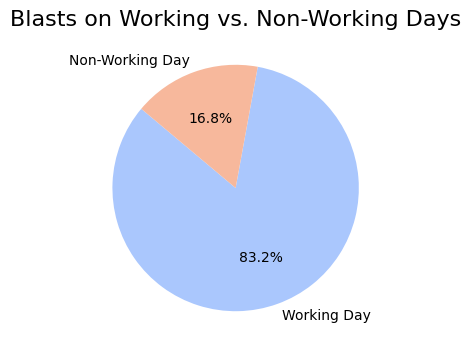

In [ ]:
# Count blasts by 'Blast Day Type'
day_type_counts = data['Blast Day Type'].value_counts()

# Plot the results as a pie chart
plt.figure(figsize=(6,4))
day_type_counts.plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentages
    startangle=140,     # Start angle for better alignment
    colors=sns.color_palette('coolwarm', len(day_type_counts))
)
plt.title('Blasts on Working vs. Non-Working Days', fontsize=16)
plt.ylabel('')  # Remove default y-axis label
plt.show()


#**Number of Blasts by Province**

<ipython-input-76-da10b392af27>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=province_counts.values, y=province_counts.index, palette='coolwarm') # Assign the plot to ax


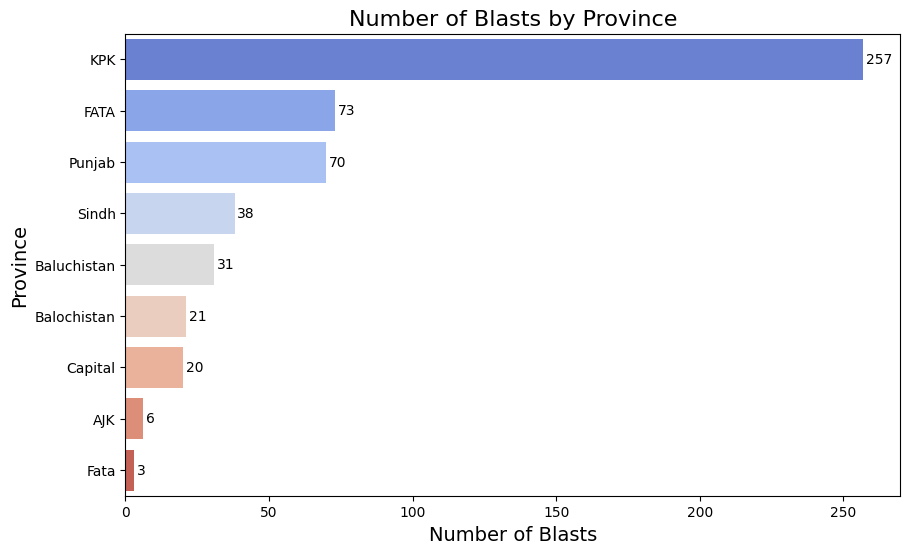

In [ ]:
# Count blasts by province
province_counts = data['Province'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=province_counts.values, y=province_counts.index, palette='coolwarm') # Assign the plot to ax
plt.title('Number of Blasts by Province', fontsize=16)
plt.xlabel('Number of Blasts', fontsize=14)
plt.ylabel('Province', fontsize=14)

# Add value labels to the bars
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text position at the end of the bar
            p.get_y() + p.get_height() / 2, # get Y position + bar height / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

plt.show()


#**Top 10 Cities with the Most Blasts**

<ipython-input-77-b263e4cdf1a6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=city_counts.values, y=city_counts.index, palette='magma')


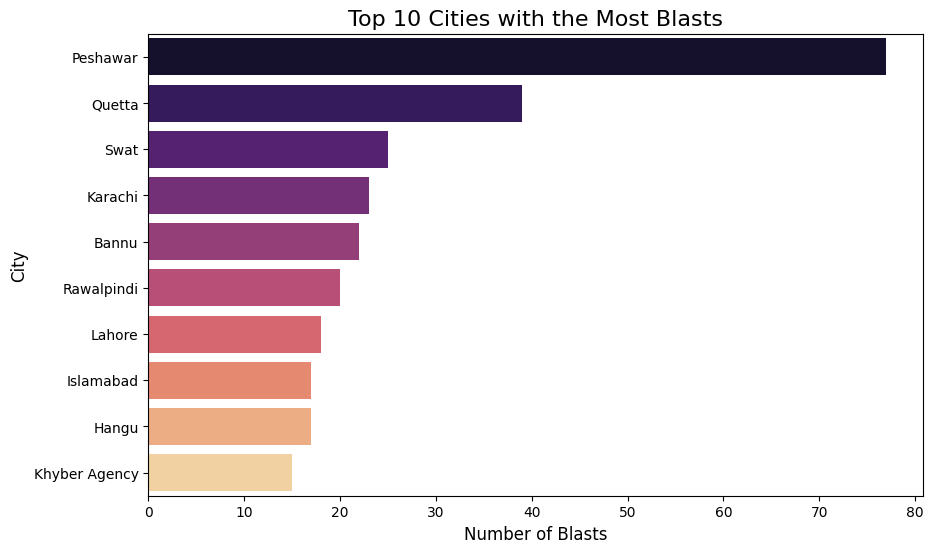

In [ ]:
# Count blasts by city
city_counts = data['City'].value_counts().head(10)  # Top 10 cities

# Plot the results
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=city_counts.values, y=city_counts.index, palette='magma')
plt.title('Top 10 Cities with the Most Blasts', fontsize=16)
plt.xlabel('Number of Blasts', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

#**How many Injured and Killed by Location Catagory (Urban vs Rural Location)**

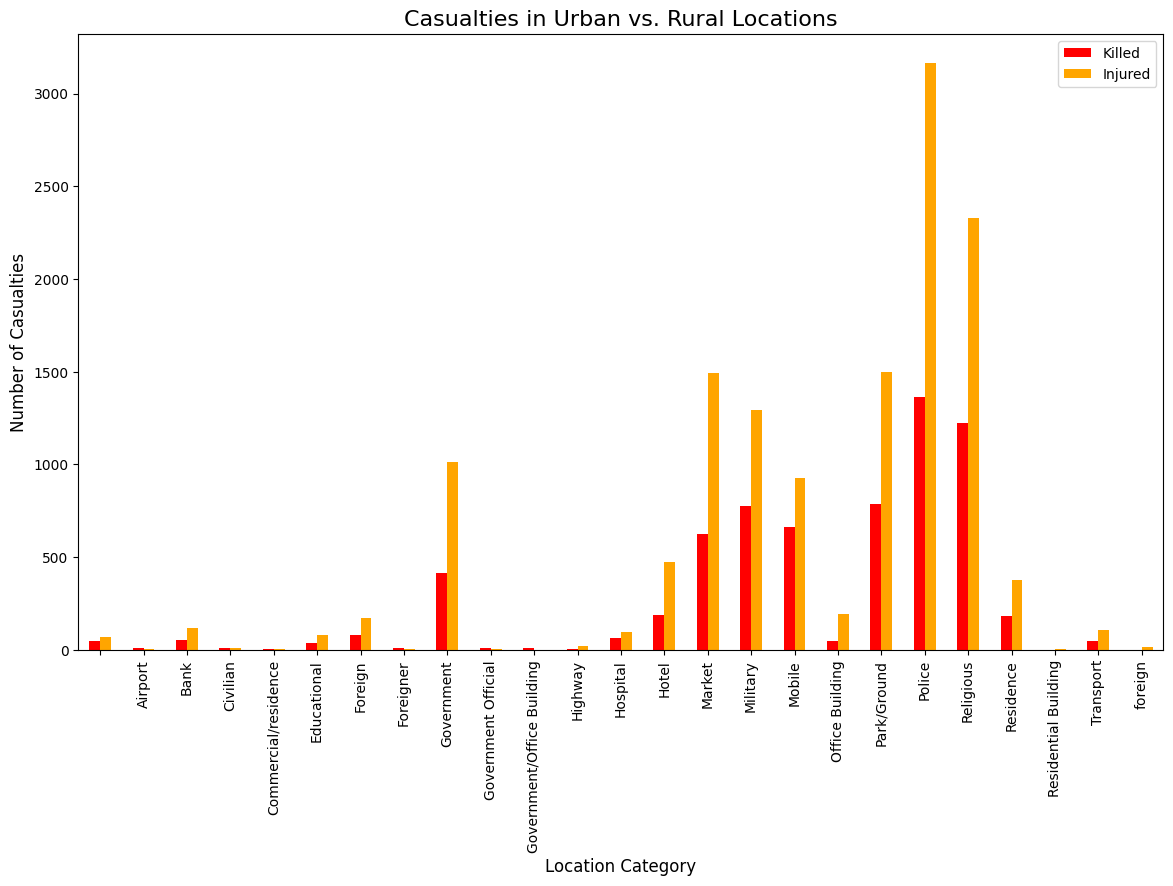

In [ ]:
# Count blasts by location category (urban/rural)
location_counts = data['Location Category'].value_counts()

# Compare casualties in urban vs. rural locations
location_casualties = data.groupby('Location Category')[['Killed Min', 'Injured Min']].sum()

# Plot the comparison
location_casualties.plot(kind='bar', figsize=(14,8), color=['red', 'orange'])
plt.title('Casualties in Urban vs. Rural Locations', fontsize=16)
plt.xlabel('Location Category', fontsize=12)
plt.ylabel('Number of Casualties', fontsize=12)
plt.legend(['Killed', 'Injured'])
plt.show()


#**Most Common Location Categories Targeted**

<ipython-input-79-2481f5c87671>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=location_category_counts.values, y=location_category_counts.index, palette='Set2')  # Assign the plot to ax


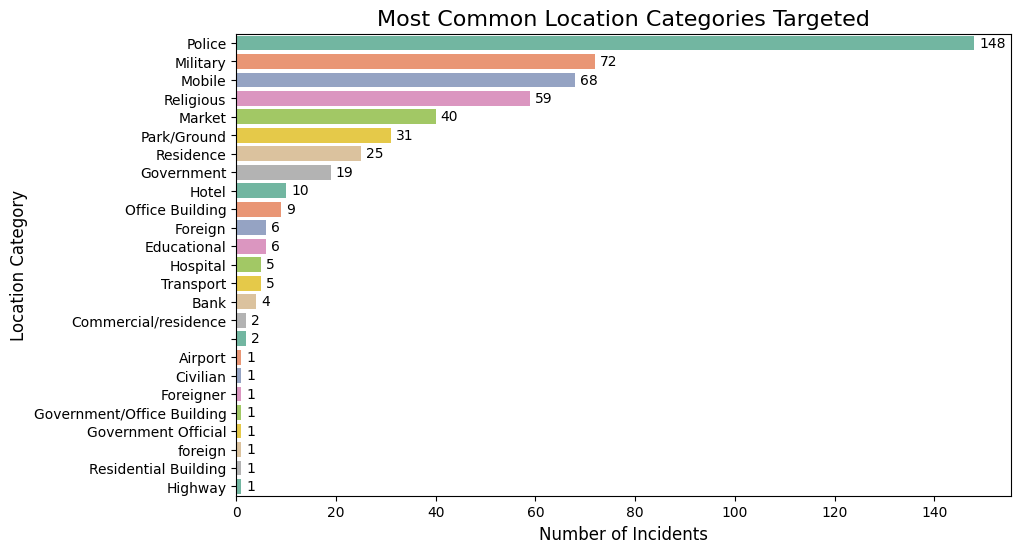

In [ ]:
# Count incidents by location category
location_category_counts = data['Location Category'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=location_category_counts.values, y=location_category_counts.index, palette='Set2')  # Assign the plot to ax
plt.title('Most Common Location Categories Targeted', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Location Category', fontsize=12)

# Add value labels to the bars
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text position at the end of the bar
            p.get_y() + p.get_height() / 2, # get Y position + bar height / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

plt.show()


#**Casualties by Location Sensitivity (High,Medium,Low)**

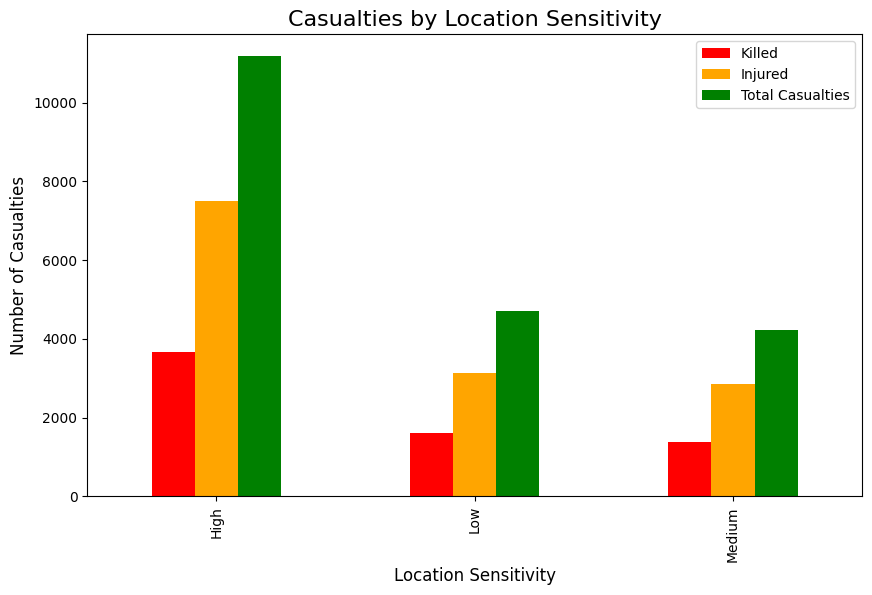

In [ ]:
# Group data by location sensitivity and calculate total casualties
sensitivity_casualties = data.groupby('Location Sensitivity')[['Killed Min', 'Injured Min']].sum()
sensitivity_casualties['Total Casualties'] = sensitivity_casualties['Killed Min'] + sensitivity_casualties['Injured Min']

# Plot the results
sensitivity_casualties.sort_values('Total Casualties', ascending=False).plot(
    kind='bar', figsize=(10, 6), color=['red', 'orange', 'green']
)
plt.title('Casualties by Location Sensitivity', fontsize=16)
plt.xlabel('Location Sensitivity', fontsize=12)
plt.ylabel('Number of Casualties', fontsize=12)
plt.legend(['Killed', 'Injured', 'Total Casualties'])
plt.show()


#**Incidents in Open vs. Closed Spaces**

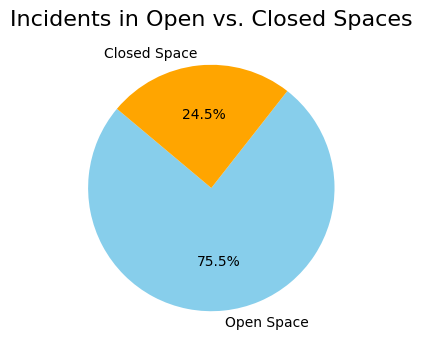

In [ ]:
# Count incidents by open and closed spaces
space_counts = data['Open and Closed Space'].value_counts()

# Plot the results
plt.figure(figsize=(6,4))
space_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Incidents in Open vs. Closed Spaces', fontsize=16)
plt.ylabel('')
plt.show()


#**Blasts by Province During Holidays**

Balochistan+Baluchistan,FATA+Fata


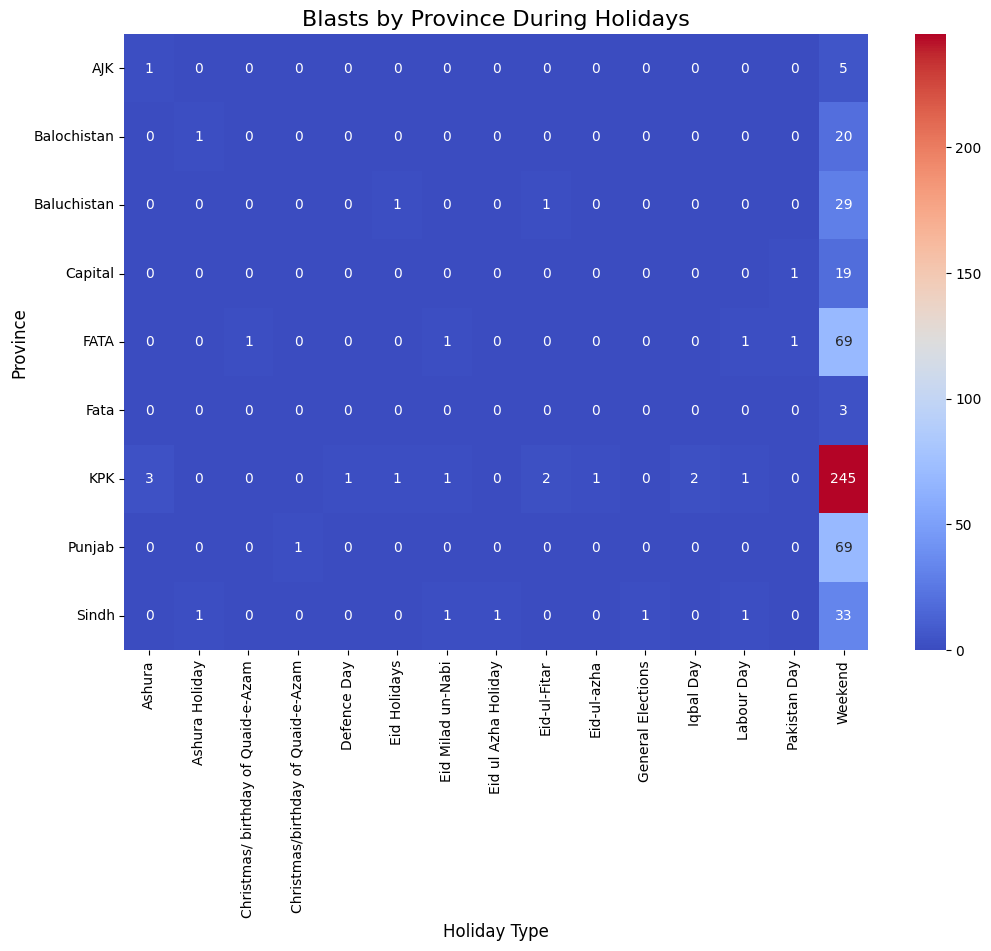

In [ ]:
# Filter blasts that occurred during holidays
holiday_blasts = data[data['Holiday Type'] != 'Non-Holiday']

# Count incidents by province and holiday type
province_holiday_counts = holiday_blasts.groupby(['Province', 'Holiday Type']).size().unstack().fillna(0)

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(province_holiday_counts, annot=True, fmt='.0f', cmap='coolwarm', cbar=True)
plt.title('Blasts by Province During Holidays', fontsize=16)
plt.xlabel('Holiday Type', fontsize=12)
plt.ylabel('Province', fontsize=12)
print("Balochistan+Baluchistan,FATA+Fata")
plt.show()


#**Casualties from Suicide vs. Non-Suicide Blasts**

<Figure size 1000x600 with 0 Axes>

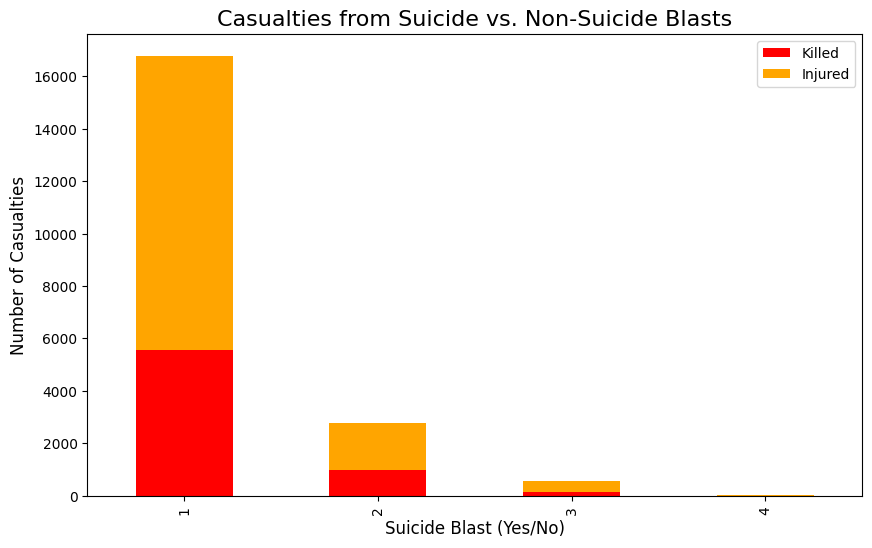

In [ ]:
# Group by suicide blasts and calculate casualties
suicide_casualties = data.groupby('No. of Suicide Blasts')[['Killed Min', 'Injured Min']].sum()
suicide_casualties['Total Casualties'] = suicide_casualties['Killed Min'] + suicide_casualties['Injured Min']

# Plot the results
plt.figure(figsize=(10, 6))
suicide_casualties[['Killed Min', 'Injured Min']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'orange'])
plt.title('Casualties from Suicide vs. Non-Suicide Blasts', fontsize=16)
plt.xlabel('Suicide Blast (Yes/No)', fontsize=12)
plt.ylabel('Number of Casualties', fontsize=12)
plt.legend(['Killed', 'Injured'])
plt.show()


#**Casualties by Target Type**

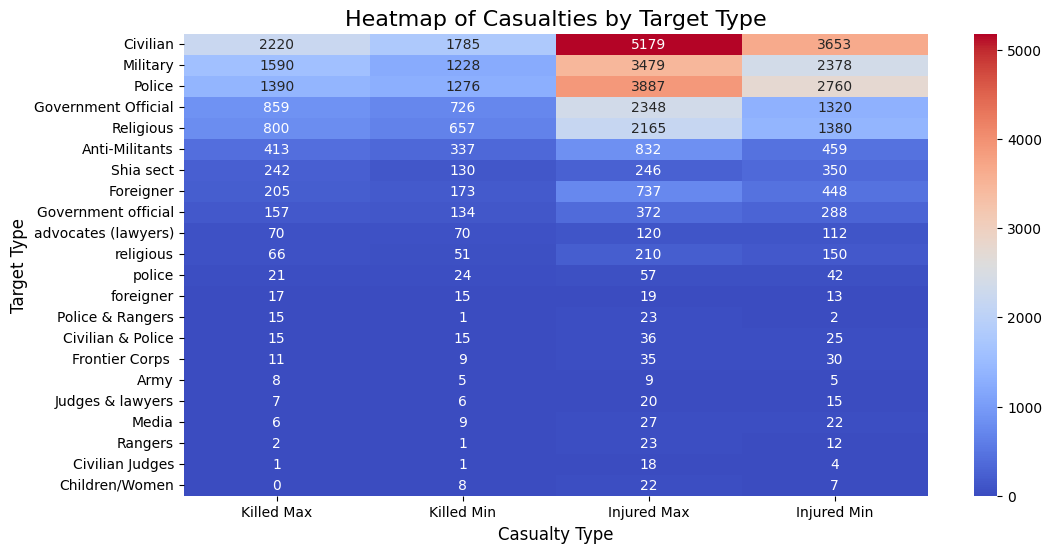

In [ ]:
# Create a heatmap for the aggregated severity data
plt.figure(figsize=(12, 6))
# Change the format code to one that supports floats
sns.heatmap(severity_by_target.set_index('Target Type'), annot=True, fmt=".0f", cmap='coolwarm')

# Add title and labels
plt.title('Heatmap of Casualties by Target Type', fontsize=16)
plt.xlabel('Casualty Type', fontsize=12)
plt.ylabel('Target Type', fontsize=12)
plt.show()
